<a href="https://colab.research.google.com/github/Crisrioja/Metodos-numericos/blob/main/metlagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=blue>Metodo de interpolacion por polinomio de Lagrange</font>

<big> El metodo de interpolacion del polinomio de Lagrange se basa en el polinomio determinado por:

$P(x) = f(x_0)L_{n,0}(x) + ... + f(x_n)L_{n,n}(x) = \sum_{k=0}^{n} f(x_k)L_{n,k}(x)$

Donde para cada

$k = 0,1,...,n$

$L_{n,k}(x)= (x-x_0)(x-x_1) ... (x-x_{k-1})(x-x_{k+1}) ... (x - x_n)/(x_k-x_0)(x_k-x_1) ... (x_k-x_{k-1})(x_k-x_{k+1}) ... (x_k-x_n)$


$L_{n,k}(x) = \prod_{i=0,i\neq k}^{n} (x-x_i)/(x_k - x_i) $

Y se escribe $L_{n,k}(x)$ simplemente como $L_k(x)$ cuando no haya confusion en cuanto a su grado


<big>Importacion de librerias

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


<big>Definicion de la funcion $log(x+1)$

In [25]:
def f(x):
  return np.log(x + 1)

<big>Definicion de los puntos de interpolacion $ x_0 = 0 , x_1 = 0.6 , x_2 = 0.9$
y se define la variable simbolica $x$

In [26]:
x_valores = np.array([0,0.6,0.9])
y_valores = np.array([f(x) for x in x_valores])

x = sp.Symbol('x')

<big> Definicion de la funcion para calcular el polinomio de lagrange

In [32]:
def polinomio_lagrange(x_valores, y_valores, x):
  n = len(x_valores)
  p = 0           #Polinomio de lagrange
  for i in range(n):
    L_i=1
    for k in range(n):
      if i != k:
        L_i *= (x-x_valores[k])/(x_valores[i]-x_valores[k])
    p += y_valores[i]*L_i
  return sp.expand(p)

<Big> Ejecucion de las funciones y su grafica

Polinomio de lagrnange: 
                     2                     
- 0.233894658134107⋅x  + 0.92367617695669⋅x


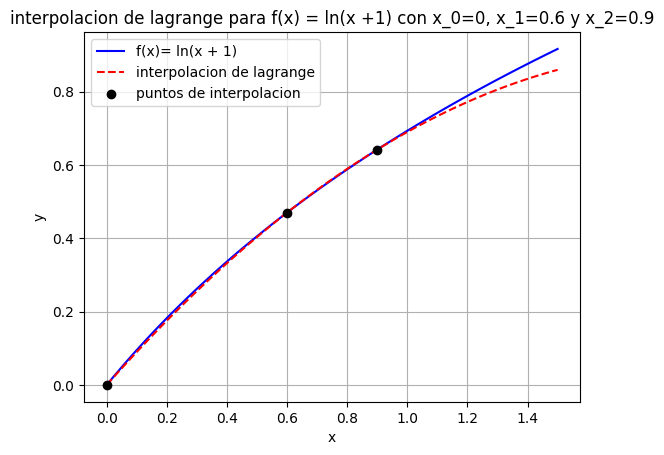

In [33]:
p_x = polinomio_lagrange(x_valores, y_valores, x) #Se calcula e imprime el polinomio de lagrange
print("Polinomio de lagrnange: ")
sp.pprint(p_x)

p_funcion = sp.lambdify(x,p_x,'numpy')    # Se convierte el poliniomio a una funcion evaluable


#Se grafica la funcion, el polinomio y los puntos de interpolacion
x_range = np.linspace(0,1.5,100)
plt.plot(x_range, [f(xi)for xi in x_range], label= "f(x)= ln(x + 1) ", color = 'blue')
plt.plot(x_range, p_funcion(x_range), label = "interpolacion de lagrange", linestyle= 'dashed', color= 'red')
plt.scatter(x_valores,y_valores,color='black', zorder=3,label='puntos de interpolacion')

plt.xlabel("x")
plt.ylabel("y")
plt.title("interpolacion de lagrange para f(x) = ln(x +1) con x_0=0, x_1=0.6 y x_2=0.9")
plt.legend()
plt.grid()
plt.show()